In [1]:
#we are working with csv files, here are the steps to import csv files in sql
# 1) create a new database in mysql
# 2) Go to import section & select the file you want to upload
# 3) Turn on this setting at the bottom part "The first line of the file contains the table column names (if this is unchecked, the first line will become part of the data)"

## About

#### This project aims to explore the Walmart Sales data to understand top performing branches and products, sales trend of of different products, customer behaviour. The aims is to study how sales strategies can be improved and optimized. The dataset was obtained from the Kaggle Walmart Sales Forecasting Competition.

## Purposes Of The Project

#### The major aim of thie project is to gain insight into the sales data of Walmart to understand the different factors that affect sales of the different branches.

## About Data

#### The dataset was obtained from the Kaggle Walmart Sales Forecasting Competition. This dataset contains sales transactions from a three different branches of Walmart, respectively located in Mandalay, Yangon and Naypyitaw. The data contains 17 columns and 1000 rows:

### 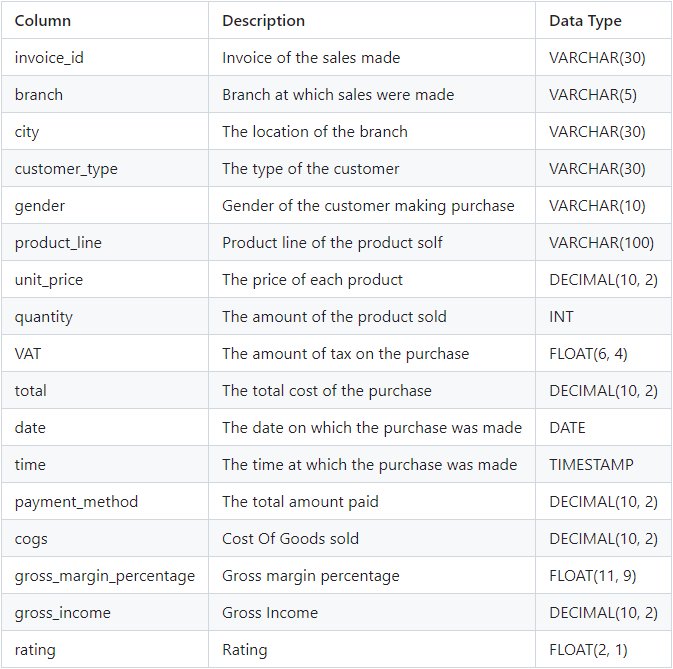

## Analysis List

### 1) Product Analysis
Conduct analysis on the data to understand the different product lines, the products lines performing best and the product lines that need to be improved.

### 2) Sales Analysis
This analysis aims to answer the question of the sales trends of product. The result of this can help use measure the effectiveness of each sales strategy the business applies and what modificatoins are needed to gain more sales.

### 3) Customer Analysis
This analysis aims to uncover the different customers segments, purchase trends and the profitability of each customer segment.

## Approach Used

### 1) Data Wrangling: This is the first step where inspection of data is done to make sure NULL values and missing values are detected and data replacement methods are used to replace, missing or NULL values.
Build a database
Create table and insert the data.
Select columns with null values in them. There are no null values in our database as in creating the tables, we set NOT NULL for each field, hence null values are filtered out.

### 2) Feature Engineering: This will help use generate some new columns from existing ones.
1) Add a new column named time_of_day to give insight of sales in the Morning, Afternoon and Evening. This will help answer the question on which part of the day most sales are made.<br><br>

2) Add a new column named day_name that contains the extracted days of the week on which the given transaction took place (Mon, Tue, Wed, Thur, Fri). This will help answer the question on which week of the day each branch is busiest.<br><br>

3) Add a new column named month_name that contains the extracted months of the year on which the given transaction took place (Jan, Feb, Mar). Help determine which month of the year has the most sales and profit.

### 3) Exploratory Data Analysis (EDA): Exploratory data analysis is done to answer the listed questions and aims of this project.

## Business Questions To Answer

### Generic Question
How many unique cities does the data have?<br>
In which city is each branch?

### Product
How many unique product lines does the data have?<br>
What is the most common payment method?<br>
What is the most selling product line?<br>
What is the total revenue by month?<br>
What month had the largest COGS?<br>
What product line had the largest revenue?<br>
What is the city with the largest revenue?<br>
What product line had the largest VAT?<br>
Fetch each product line and add a column to those product line showing "Good", "Bad". Good if its greater than average sales<br>
Which branch sold more products than average product sold?<br>
What is the most common product line by gender?<br>
What is the average rating of each product line?<br>

### Sales
Number of sales made in each time of the day per weekday<br>
Which of the customer types brings the most revenue?<br>
Which city has the largest tax percent/ VAT (Value Added Tax)?<br>
Which customer type pays the most in VAT?<br>

### Customer
How many unique customer types does the data have?<br>
How many unique payment methods does the data have?<br>
What is the most common customer type?<br>
Which customer type buys the most?<br>
What is the gender of most of the customers?<br>
What is the gender distribution per branch?<br>
Which time of the day do customers give most ratings?<br>
Which time of the day do customers give most ratings per branch?<br>
Which day fo the week has the best avg ratings?<br>
Which day of the week has the best average ratings per branch?<br>

## Revenue And Profit Calculations

### 
$ COGS = unitsPrice * quantity $

$ VAT = 5% * COGS $

V
A
T
 is added to the 
C
O
G
S
 and this is what is billed to the customer.

$ total(gross_sales) = VAT + COGS $

$ grossProfit(grossIncome) = total(gross_sales) - COGS $

Gross Margin is gross profit expressed in percentage of the total(gross profit/revenue)

$ \text{Gross Margin} = \frac{\text{gross income}}{\text{total revenue}} $

Example with the first row in our DB:

Data given:

$ \text{Unite Price} = 45.79 $
$ \text{Quantity} = 7 $
$ COGS = 45.79 * 7 = 320.53 $

$ \text{VAT} = 5% * COGS\= 5% 320.53 = 16.0265 $

$ total = VAT + COGS\= 16.0265 + 320.53 = 
336.5565

$ \text{Gross Margin Percentage} = \frac{\text{gross income}}{\text{total revenue}}\=\frac{16.0265}{336.5565} = 0.047619\\approx 4.7619% $

# Project Starts from here

## 1) Add a new column named time_of_day to give insight of sales in the Morning, Afternoon and Evening. This will help answer the question on which part of the day most sales are made.

### With this we get the data classified into time of day
SELECT Time,(CASE
            WHEN Time BETWEEN "00:00:00" AND "12:00:00" THEN "Morning"
            WHEN Time BETWEEN "12:01:00" AND "16:00:00" THEN "Afternoon"
            ELSE "Evening"
            END
            ) AS time_of_day
FROM walmartsalesdata_csv;

### 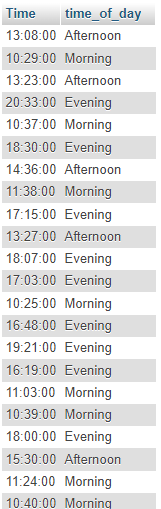

### but we need to add new column in our data & want to group them to count total data

### 
SELECT Time,(CASE
            WHEN Time BETWEEN "00:00:00" AND "12:00:00" THEN "Morning"
            WHEN Time BETWEEN "12:01:00" AND "16:00:00" THEN "Afternoon"
            ELSE "Evening"
            END
            ) AS time_of_day
FROM walmartsalesdata_csv;

#this will just add a new column to the table not the data
ALTER TABLE walmartsalesdata_csv ADD COLUMN time_of_day varchar(20);

### now we need to add data in the column of our table

### ### 
SELECT Time,(CASE
            WHEN Time BETWEEN "00:00:00" AND "12:00:00" THEN "Morning"
            WHEN Time BETWEEN "12:01:00" AND "16:00:00" THEN "Afternoon"
            ELSE "Evening"
            END
            ) AS time_of_day
FROM walmartsalesdata_csv;

#this will just add a new column to the table not the data
#ALTER TABLE walmartsalesdata_csv ADD COLUMN time_of_day varchar(20);

#now we will update the data in the table column as shown below
UPDATE walmartsalesdata_csv
SET time_of_day=(
    CASE
                WHEN Time BETWEEN "00:00:00" AND "12:00:00" THEN "Morning"
                WHEN Time BETWEEN "12:01:00" AND "16:00:00" THEN "Afternoon"
                ELSE "Evening"
    END
);

## 2) Add a new column named day_name that contains the extracted days of the week on which the given transaction took place (Mon, Tue, Wed, Thur, Fri). This will help answer the question on which week of the day each branch is busiest.

### from this we had bring the name of the days from the date column
### SELECT Date, DAYNAME(Date) FROM walmartsalesdata_csv;

### 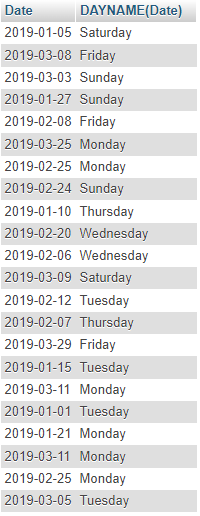

### now we want to add new column in our dataset named day_name

### ALTER TABLE walmartsalesdata_csv ADD COLUMN day_name varchar(10);
### this will only add a new column to the data set now it's time to enter data into this column

### this query will update the column in the data set
UPDATE walmartsalesdata_csv
SET day_name= DAYNAME(Date);

### if you check a column had been added at last named day_name with all the data inserted

## 3) Add a new column named month_name that contains the extracted months of the year on which the given transaction took place (Jan, Feb, Mar). Help determine which month of the year has the most sales and profit.

### now we need to add another new column named month_name in our dataset

### ALTER TABLE walmartsalesdata_csv ADD COLUMN month_name varchar(10);
### this will add a new column in our dataset, now we need to add data into the column

### now this will add data in our dataset
### UPDATE walmartsalesdata_csv SET month_name= MONTHNAME(Date);

### 

## 4) How many unique cities does the data have?

### SELECT DISTINCT City FROM walmartsalesdata_csv;
### we have total 3 different cities in our dataset

### 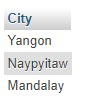

## 5) In which city is each brand ?

### SELECT DISTINCT City, Branch FROM walmartsalesdata_csv;

### 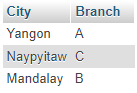

## 6) How many unique product lines does the data have ?

### SELECT COUNT(DISTINCT Product_line) FROM walmartsalesdata_csv;
### the business have total 6 unique product lines

### 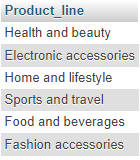

## 7) What is the most common payment method ?

### as we can see that e wallet & cash are the most common payment method
SELECT Payment,COUNT(Payment) 
FROM walmartsalesdata_csv
GROUP BY Payment;

### 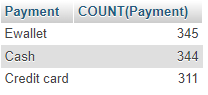

## 8) What is the most selling product line ?

### As we can see that Fashion accessories & Food beverages are the most selling product line
SELECT Product_line, COUNT(Product_line) as prod
FROM walmartsalesdata_csv
GROUP BY Product_line
ORDER BY prod DESC;

### 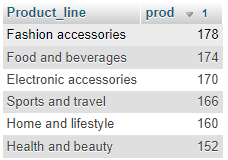

## 9) What is the total revenue by the month ?

### as we can see that janauary had the highest revenue
SELECT 
month_name AS month,
SUM(Total) AS total_revenue
FROM walmartsalesdata_csv
GROUP BY month_name
ORDER BY total_revenue DESC;

### 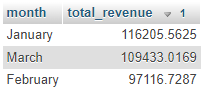

## 10) What month had the largest COGS ?

### As you can see that january month had the highest cogs
SELECT month_name AS month, SUM(cogs) AS COGS
FROM walmartsalesdata_csv
GROUP BY month_name
ORDER BY cogs DESC;

### 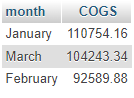

## 11) What product line had the largest revenue ?

### As from the data we can say that food & beverages had the highest revenue.
SELECT Product_line, SUM(Total) AS total_revenue
FROM walmartsalesdata_csv
GROUP BY Product_line
ORDER BY total_revenue;

### 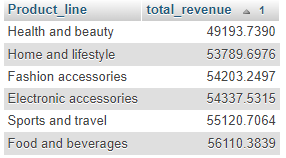

## 12) What is the city with the largest revenue ?

### As we can see that city naypyitaw had the largest revenue.
SELECT City, SUM(Total) AS total_revenue
FROM walmartsalesdata_csv
GROUP BY City
ORDER BY total_revenue DESC;

### 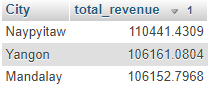

## 13) What product lines had the largest VAT (TAX) ?

### As we can see that food & beverages had the largest tax
SELECT Product_line, SUM(Tax) AS total_tax 
FROM walmartsalesdata_csv 
GROUP BY Product_line 
ORDER BY total_tax DESC;

### 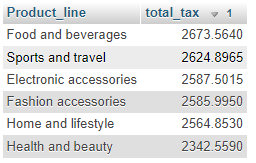

## 14) Which branch sold more products than average product sold ?

### As we can see that branch A had sold more products than average product sold
SELECT Branch, SUM(Quantity) AS total_qty
FROM walmartsalesdata_csv
GROUP BY Branch
HAVING SUM(Quantity)> (SELECT AVG(Quantity) FROM walmartsalesdata_csv);

### 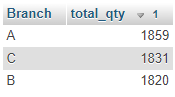

## 15) What is the most common product line by gender ?

### As we can see that Gender female & product line fashion accessories have the highest count
SELECT Gender,Product_line, COUNT(Gender) AS total_gen
FROM walmartsalesdata_csv
GROUP BY Gender, Product_line
ORDER BY total_gen DESC;

### 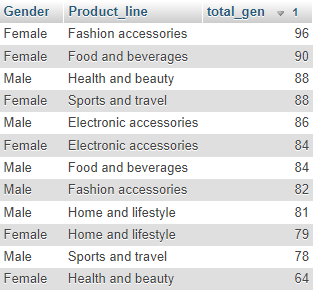

## 16) What is the average rating of each product line ?

### 
SELECT AVG(Rating) AS avg_rating, Product_line
FROM walmartsalesdata_csv
GROUP BY Product_line
ORDER BY avg_rating DESC;

### 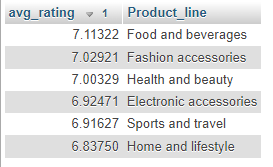

## 17) Number of sales made in each time of the day per weekday ?

### we had counted for monday, you can change the day as per your requirement
SELECT time_of_day, COUNT(*) AS total_sales
FROM walmartsalesdata_csv
WHERE day_name="Monday" #need to change day name here for other days
GROUP BY time_of_day
ORDER BY total_sales DESC;

### 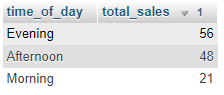

## 18) Which of the customer types brings the most revenue ?

### As we can see that customer type member brings the most revenue
SELECT Customer_type,
SUM(Total) AS total_rev
FROM walmartsalesdata_csv
GROUP BY Customer_type
ORDER BY total_rev DESC;

### 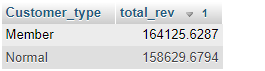

## 19) Which city has the largest tax/vat percent ?

### 
SELECT City, AVG(Tax) as avg_tax
FROM walmartsalesdata_csv
GROUP BY City
ORDER BY avg_tax DESC;

### 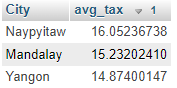

## 20) Which customer type pays the most tax/vat ?

### 
SELECT Customer_type, AVG(Tax) AS TAX
FROM walmartsalesdata_csv
GROUP BY Customer_type
ORDER BY TAX DESC;

### 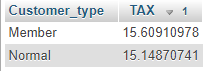

## 21) How many unique customer types does the data have?

### SELECT COUNT(DISTINCT(Customer_type)) FROM walmartsalesdata_csv;

### 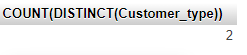

## 22) How many unique payment methods does the data have?

### SELECT COUNT(DISTINCT(Payment)) FROM walmartsalesdata_csv;

### 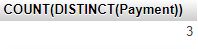

## 23) What is the most common customer type?

### 
SELECT Customer_type,COUNT(*) AS customer_count
FROM walmartsalesdata_csv
GROUP BY Customer_type;

### 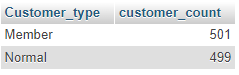

## 24) What is the gender of most of the customers?

### 
SELECT Gender, COUNT(*) AS gender_count
FROM walmartsalesdata_csv
GROUP BY Gender
ORDER BY gender_count DESC;

### 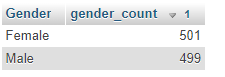

## 25) What is the gender distribution per branch?

### we had calculated it for branch C, you can change accordingly
SELECT Gender, COUNT(*) AS gender_count
FROM walmartsalesdata_csv
WHERE Branch="C" #you can change the branch here
GROUP BY Gender
ORDER BY gender_count DESC;

### 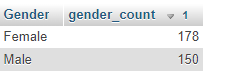

## 26) Which time of the day do customers give most ratings?

### 
SELECT time_of_day, SUM(Rating) AS total_rating
FROM walmartsalesdata_csv
GROUP BY time_of_day
ORDER BY total_rating;

### 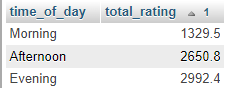

## 27) Which time of the day do customers give most ratings per branch?

### We had calculated for branch C, you can change it accordingly
SELECT time_of_day, SUM(Rating) AS total_rating
FROM walmartsalesdata_csv
WHERE Branch="C"
GROUP BY time_of_day
ORDER BY total_rating;

### 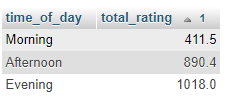

## 28) Which day of the week has the best avg ratings?

### 
SELECT day_name, AVG(Rating) AS avg_rating
FROM walmartsalesdata_csv
GROUP BY day_name
ORDER BY avg_rating DESC;

### 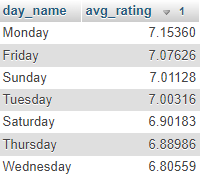

## 29) Which day of the week has the best average ratings per branch?

### 
SELECT day_name, AVG(Rating) AS avg_rating
FROM walmartsalesdata_csv
WHERE Branch="C"
GROUP BY day_name
ORDER BY avg_rating DESC;

### 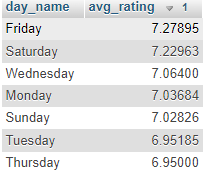